In [ ]:
!wget https://raw.githubusercontent.com/soydz/ia-saberpro-prediction/main/data/train.zip
!unzip train.zip

--2025-10-29 20:14:03--  https://raw.githubusercontent.com/soydz/ia-saberpro-prediction/main/data/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19229940 (18M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  18.34M   108MB/s    in 0.2s    

2025-10-29 20:14:04 (108 MB/s) - ‘train.zip’ saved [19229940/19229940]

Archive:  train.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import unicodedata

train = pd.read_csv('train.csv')
train.head(1)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.31,0.267


### Realiza una pequeña exploración de los datos
- Cantidad de datos
- Columnas y de que tipo
- Porcentaje de valores nulos por columnas

In [ ]:
train.shape

(692500, 21)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

In [ ]:
train.isnull().mean() * 100

,0
ID,0.000000
PERIODO_ACADEMICO,0.000000
E_PRGM_ACADEMICO,0.000000
E_PRGM_DEPARTAMENTO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.907870
E_HORASSEMANATRABAJA,4.455884
F_ESTRATOVIVIENDA,4.640722
F_TIENEINTERNET,3.845343
F_EDUCACIONPADRE,3.347004
F_TIENELAVADORA,5.743394


Obtengo 5 filas aleatorias, mostrando la totalidad de columnas. Todo esto con la finalidad de obtener un panorama rapido de los datos.

In [ ]:
pd.set_option('display.max_columns', None)
train.sample(n=5)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
82170,842008,20203,CONTADURIA PUBLICA,ANTIOQUIA,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 1,No,Primaria completa,No,No,N,No,Si,No,Secundaria (Bachillerato) completa,medio-bajo,0.160,0.419,0.235,0.305
666528,941240,20195,LICENCIATURA EN MUSICA,BOYACA,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 1,No,No sabe,No,No,N,No,No,No,Primaria completa,medio-alto,0.146,0.409,0.235,0.283
386581,882141,20183,PSICOLOGIA,SANTANDER,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,Si,Si,Si,Primaria incompleta,bajo,0.328,0.212,0.288,0.275
557577,309589,20212,ADMINISTRACIÓN DE EMPRESAS,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 3,Si,Primaria completa,Si,No,N,Si,Si,Si,Primaria completa,medio-bajo,0.307,0.210,0.275,0.267
475718,981515,20212,JURISPRUDENCIA,BOGOTÁ,Más de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,Si,N,No,Si,Si,Educación profesional completa,medio-alto,0.294,0.224,0.296,0.273


Se hace que colab, muestre la totalidad de columnas, de forma informativa. En la siguiente celda, se procede a eliminar la anterior configuracion, dejando la cantidad de columnas a mostrar, de forma estandar.

In [ ]:
pd.reset_option('display.max_columns')

## Limpieza y Preprocesado

### Columnas duplicada

Dos columnas con aparentemente los mismos datos.

Comprueba si `F_TIENEINTERNET` es igual a `F_TIENEINTERNET.1`

In [ ]:
train[(train['F_TIENEINTERNET'] != train['F_TIENEINTERNET.1']) & (train['F_TIENEINTERNET'].notna()) & (train['F_TIENEINTERNET.1'].notna())]

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4


Comprueba que son iguales, por lo tanto, lo mejor es eliminar una de ellas

In [ ]:
train.drop(columns=['F_TIENEINTERNET.1'], inplace=True)

###Filas duplicadas

In [ ]:
filas_ant = train.shape[0]
train.drop_duplicates(inplace=True)
print(f'Filas duplicadas que han sido eliminadas {filas_ant - train.shape[0]}')
print(train.shape)

Filas duplicadas que han sido eliminadas 0
(692500, 20)


### Columnas irrelevantes

Se parte de la supocicion de que las columnas `ID` y `PERIODO_ACADEMICO`, no afectan en el rendimiento del estudiante.

In [ ]:
train['PERIODO_ACADEMICO'].value_counts()

,count
PERIODO_ACADEMICO,
20195,180873
20203,171838
20212,171412
20183,164818
20194,1472
20213,1178
20202,490
20184,254
20196,165


In [ ]:
train.drop(columns=['ID', 'PERIODO_ACADEMICO'], inplace=True)

In [ ]:
train.E_PRIVADO_LIBERTAD.value_counts()

,count
E_PRIVADO_LIBERTAD,
N,692466
S,34


Una columna donde el 99.999% de los valores son idénticos (692466 'N' de un total de 692498 filas) se considera una caracteristica de varianza extremadamente baja o casi cero. Los 34 casos distintos no representan una variabilidad significativa para el entrenamiento del modelo.

El modelo depende de variabilidad de las caracteristicas para encontrar patrones que explique la variable objetivo. `E_PRIVADO_LIBERTAD` presenta una variabilidad practicamente inexistente, por lo que no aporta mucho informacion relevante. De hecho, mantenerla podria ser perjudicial, ya que introduciria ruido y aumentaria innecesariamente el tiempo de computo.

In [ ]:
train.drop(columns=['E_PRIVADO_LIBERTAD'], inplace=True)

In [ ]:
train.shape

(692500, 17)

In [ ]:
train.columns

Index(['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO',
       'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4'],
      dtype='object')

### Eliminación de valores nulos

Filas con valores nulos

In [ ]:
len(train[train.isnull().any(axis=1)])

63604

In [ ]:
for i in range(train.shape[1] - 1, -1, -1):
  print(f'Filas con {i} valores nulos: {(train.isnull().sum(axis=1) == i).sum()}')

Filas con 16 valores nulos: 0
Filas con 15 valores nulos: 0
Filas con 14 valores nulos: 0
Filas con 13 valores nulos: 0
Filas con 12 valores nulos: 0
Filas con 11 valores nulos: 0
Filas con 10 valores nulos: 1639
Filas con 9 valores nulos: 18
Filas con 8 valores nulos: 19162
Filas con 7 valores nulos: 937
Filas con 6 valores nulos: 2434
Filas con 5 valores nulos: 1362
Filas con 4 valores nulos: 2457
Filas con 3 valores nulos: 8471
Filas con 2 valores nulos: 10563
Filas con 1 valores nulos: 16561
Filas con 0 valores nulos: 628896


In [ ]:
(train.isnull().mean() * 100).sort_values(ascending=False)

,0
F_TIENEAUTOMOVIL,6.299350
F_TIENELAVADORA,5.743394
F_TIENECOMPUTADOR,5.502238
F_ESTRATOVIVIENDA,4.640722
E_HORASSEMANATRABAJA,4.455884
F_TIENEINTERNET,3.845343
F_EDUCACIONMADRE,3.417184
F_EDUCACIONPADRE,3.347004
E_PAGOMATRICULAPROPIO,0.938339
E_VALORMATRICULAUNIVERSIDAD,0.907870


Filas con mas del 29% de valores nulos, es decir, mas de 5 columnas no tienen datos.

In [ ]:
(train.isnull().sum(axis=1) >= 5).sum()

np.int64(25552)

In [ ]:
filas_nulas = train[(train.isnull().sum(axis=1) / (len(train.columns)) * 100) > 29]
filas_nulas.head()

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
21,INGENIERIA MECATRONICA,VALLE,Entre 5.5 millones y menos de 7 millones,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,medio-bajo,0.029,0.037,0.048,0.026
26,DERECHO,BOLIVAR,Entre 2.5 millones y menos de 4 millones,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,medio-bajo,0.017,0.034,0.023,0.023
48,INGENIERIA MECATRONICA,BOGOTÁ,Entre 4 millones y menos de 5.5 millones,NaN,Estrato 3,NaN,Secundaria (Bachillerato) completa,NaN,NaN,Si,NaN,Técnica o tecnológica completa,bajo,0.307,0.244,0.313,0.273
49,LICENCIATURA EN CIENCIAS SOCIALES,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,NaN,NaN,NaN,NaN,NaN,NaN,Si,NaN,NaN,bajo,0.010,0.015,0.030,0.012
58,TRABAJO SOCIAL,VALLE,Entre 1 millón y menos de 2.5 millones,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,bajo,0.007,0.033,0.037,0.048


In [ ]:
print(f'Las filas que valores nulos en mas de 5 columnas, corresponde al : {round((filas_nulas.shape[0] * 100) / len(train), 3)}%')

Las filas que valores nulos en mas de 5 columnas, corresponde al : 3.69%


Tener un registro con tal cantidad de valores nulos, requeriria una imputacion considerable de esas caracteristicas, pero supondria introducir una alta proporcion de datos sinteticos, donde se tiene el riesgo de  introducir ruido o sesgo artificial. Estos datos representan aproximadamente un 3.7% del total de los datos. Perder estos datos es un sacrificios razoble, si en cambio, mejoramos la calidad de los datos.

In [ ]:
train = train.dropna(axis=0, thresh= int(len(train.columns) * 0.6))

In [ ]:
train.shape

(671681, 17)

In [ ]:
(train.isnull().mean() * 100).sort_values(ascending=False).head(11)

,0
F_TIENEAUTOMOVIL,3.395064
F_TIENELAVADORA,2.821875
F_TIENECOMPUTADOR,2.573245
F_ESTRATOVIVIENDA,1.685026
E_HORASSEMANATRABAJA,1.494906
F_TIENEINTERNET,0.864994
E_PAGOMATRICULAPROPIO,0.715518
E_VALORMATRICULAUNIVERSIDAD,0.685296
F_EDUCACIONMADRE,0.428775
F_EDUCACIONPADRE,0.357461


In [ ]:
print('% de valores nulos para: E_VALORMATRICULAUNIVERSIDAD', (train['E_VALORMATRICULAUNIVERSIDAD'].isnull().mean()*100).round(3))
print('% de valores nulos para: E_PAGOMATRICULAPROPIO', (train['E_PAGOMATRICULAPROPIO'].isnull().mean()*100).round(3))

% de valores nulos para: E_VALORMATRICULAUNIVERSIDAD 0.685
% de valores nulos para: E_PAGOMATRICULAPROPIO 0.716


`E_VALORMATRICULAUNIVERSIDAD` y `E_PAGOMATRICULAPROPIO` con datos faltantes, corresponde a menos del 0.7% y 0.72% de los datos respectivamente. Una buena opción es eliminar dichas filas.

In [ ]:
filas_previas = train.shape[0]
train.dropna(subset=['E_VALORMATRICULAUNIVERSIDAD', 'E_PAGOMATRICULAPROPIO'], inplace=True)
filas_eliminadas = filas_previas - train.shape[0]
print("Filas eliminadas", filas_eliminadas, "correspondiente al", round(((filas_eliminadas * 100) / filas_previas), 3), "% del total de los datos")

Filas eliminadas 4806 correspondiente al 0.716 % del total de los datos


In [ ]:
train.shape

(666875, 17)

In [ ]:
(train.isnull().mean() * 100).sort_values(ascending=False).head(11)

,0
F_TIENEAUTOMOVIL,3.408135
F_TIENELAVADORA,2.832465
F_TIENECOMPUTADOR,2.583393
F_ESTRATOVIVIENDA,1.690122
E_HORASSEMANATRABAJA,1.496832
F_TIENEINTERNET,0.868978
F_EDUCACIONMADRE,0.430216
F_EDUCACIONPADRE,0.357638
E_PRGM_ACADEMICO,0.000000
E_VALORMATRICULAUNIVERSIDAD,0.000000


Remplazamos los Null en `F_ESTRATOVIVIENDA`, `F_TIENEINTERNET`, `F_TIENECOMPUTADOR`, `F_TIENELAVADORA`, `F_TIENEAUTOMOVIL`, por los valores mas frecuentes

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
train['F_ESTRATOVIVIENDA'] = imputer.fit_transform(train[['F_ESTRATOVIVIENDA']])[:, 0]
train['F_TIENEINTERNET'] = imputer.fit_transform(train[['F_TIENEINTERNET']])[:, 0]
train['F_TIENECOMPUTADOR'] = imputer.fit_transform(train[['F_TIENECOMPUTADOR']])[:, 0]
train['F_TIENELAVADORA'] = imputer.fit_transform(train[['F_TIENELAVADORA']])[:, 0]
train['F_TIENEAUTOMOVIL'] = imputer.fit_transform(train[['F_TIENEAUTOMOVIL']])[:, 0]

Se parte de la suposición de que el estrato socioeconómico tiene relación con el nivel educativo de los padres.

Por cada valor nulo de `F_EDUCACIONPADRE` o `F_EDUCACIONMADRE`, se agrupa por el estrato. Luego para cada grupo se calcula su valor mas frecuente, con este valor se remplaza los valores nulos, dentro de cada estrato.

In [ ]:
train['F_EDUCACIONPADRE'] = train.groupby('F_ESTRATOVIVIENDA')['F_EDUCACIONPADRE'].transform(lambda x: x.fillna(x.mode()[0]))
train['F_EDUCACIONMADRE'] = train.groupby('F_ESTRATOVIVIENDA')['F_EDUCACIONMADRE'].transform(lambda x: x.fillna(x.mode()[0]))

Comprueba el numero de datos nulos y en que columnas

In [ ]:
train.isnull().sum()

,0
E_PRGM_ACADEMICO,0
E_PRGM_DEPARTAMENTO,0
E_VALORMATRICULAUNIVERSIDAD,0
E_HORASSEMANATRABAJA,9982
F_ESTRATOVIVIENDA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0
F_TIENEAUTOMOVIL,0
E_PAGOMATRICULAPROPIO,0


Aun queda una columna por eliminar los valores nulos, `E_HORASSEMANATRABAJA`

En la siguiete celda, se comprueba cuantos valores hay y de que tipo

In [ ]:
train['E_HORASSEMANATRABAJA'].value_counts(dropna=False)

,count
E_HORASSEMANATRABAJA,
Más de 30 horas,247704
0,115521
Entre 11 y 20 horas,115044
Entre 21 y 30 horas,91987
Menos de 10 horas,86637
NaN,9982


<Axes: ylabel='E_HORASSEMANATRABAJA'>

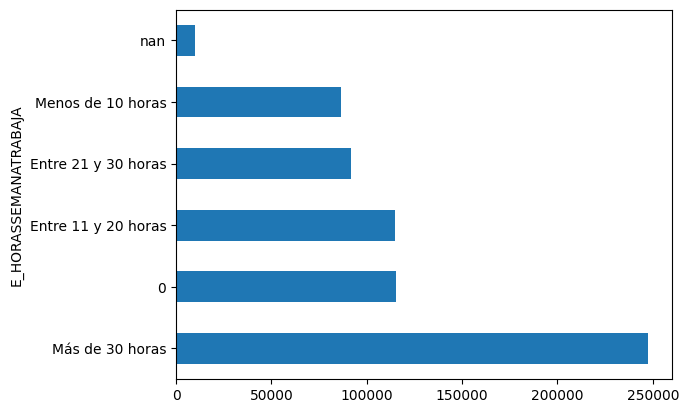

In [ ]:
train['E_HORASSEMANATRABAJA'].value_counts(dropna=False).plot(kind='barh')

Convierte la columna `E_HORASSEMANATRABAJA` de categorica a numerica

In [ ]:
train['E_HORASSEMANATRABAJA'] = train['E_HORASSEMANATRABAJA'].map({'0': 0, 'Menos de 10 horas': 9, 'Entre 11 y 20 horas': 15.5, 'Entre 21 y 30 horas': 25.5, 'Más de 30 horas': 31})

A los valores nulos, les asignamos la media

In [ ]:
train['E_HORASSEMANATRABAJA'] = train['E_HORASSEMANATRABAJA'].fillna((train['E_HORASSEMANATRABAJA'].mean()).round(3))

In [ ]:
train['E_HORASSEMANATRABAJA'].value_counts()

,count
E_HORASSEMANATRABAJA,
31.000,247704
0.000,115521
15.500,115044
25.500,91987
9.000,86637
19.162,9982


<Axes: ylabel='E_HORASSEMANATRABAJA'>

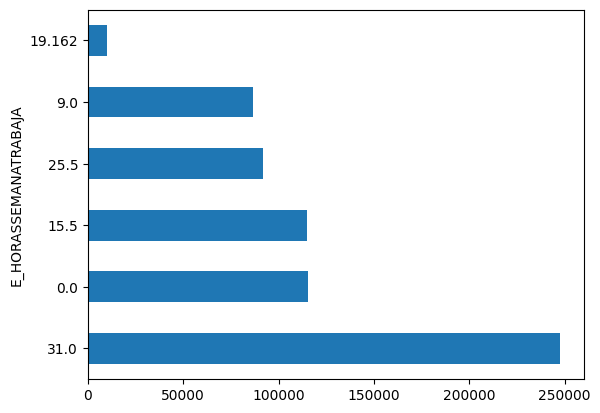

In [ ]:
train['E_HORASSEMANATRABAJA'].value_counts(dropna=False).plot(kind='barh')

Comprueba que todas las columnas tienen igual cantidad de datos

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   E_PRGM_ACADEMICO             666875 non-null  object 
 1   E_PRGM_DEPARTAMENTO          666875 non-null  object 
 2   E_VALORMATRICULAUNIVERSIDAD  666875 non-null  object 
 3   E_HORASSEMANATRABAJA         666875 non-null  float64
 4   F_ESTRATOVIVIENDA            666875 non-null  object 
 5   F_TIENEINTERNET              666875 non-null  object 
 6   F_EDUCACIONPADRE             666875 non-null  object 
 7   F_TIENELAVADORA              666875 non-null  object 
 8   F_TIENEAUTOMOVIL             666875 non-null  object 
 9   E_PAGOMATRICULAPROPIO        666875 non-null  object 
 10  F_TIENECOMPUTADOR            666875 non-null  object 
 11  F_EDUCACIONMADRE             666875 non-null  object 
 12  RENDIMIENTO_GLOBAL           666875 non-null  object 
 13  INDI

### Agrupación de valores

In [ ]:
for col in train.columns:
  print(f'Columna {col}: {train[col].nunique()} valores unicos')

Columna E_PRGM_ACADEMICO: 941 valores unicos
Columna E_PRGM_DEPARTAMENTO: 31 valores unicos
Columna E_VALORMATRICULAUNIVERSIDAD: 8 valores unicos
Columna E_HORASSEMANATRABAJA: 6 valores unicos
Columna F_ESTRATOVIVIENDA: 7 valores unicos
Columna F_TIENEINTERNET: 2 valores unicos
Columna F_EDUCACIONPADRE: 12 valores unicos
Columna F_TIENELAVADORA: 2 valores unicos
Columna F_TIENEAUTOMOVIL: 2 valores unicos
Columna E_PAGOMATRICULAPROPIO: 2 valores unicos
Columna F_TIENECOMPUTADOR: 2 valores unicos
Columna F_EDUCACIONMADRE: 12 valores unicos
Columna RENDIMIENTO_GLOBAL: 4 valores unicos
Columna INDICADOR_1: 375 valores unicos
Columna INDICADOR_2: 342 valores unicos
Columna INDICADOR_3: 196 valores unicos
Columna INDICADOR_4: 276 valores unicos


In [ ]:
train['E_PRGM_DEPARTAMENTO'].unique()

array(['BOGOTÁ', 'ATLANTICO', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'SUCRE',
       'CAQUETA', 'CUNDINAMARCA', 'BOLIVAR', 'TOLIMA', 'VALLE', 'QUINDIO',
       'RISARALDA', 'CORDOBA', 'META', 'LA GUAJIRA', 'BOYACA', 'NARIÑO',
       'CAUCA', 'NORTE SANTANDER', 'CESAR', 'PUTUMAYO', 'CALDAS',
       'MAGDALENA', 'CHOCO', 'CASANARE', 'ARAUCA', 'GUAVIARE', 'AMAZONAS',
       'VAUPES', 'SAN ANDRES'], dtype=object)

In [ ]:
train['E_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula'], dtype=object)

In [ ]:
train['E_HORASSEMANATRABAJA'].unique()

array([ 9.   ,  0.   , 31.   , 25.5  , 15.5  , 19.162])

In [ ]:
train['F_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       'Estrato 6', 'Sin Estrato'], dtype=object)

In [ ]:
train['F_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica'], dtype=object)

In [ ]:
train['F_EDUCACIONMADRE'].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', 'Ninguno',
       'No Aplica', 'No sabe'], dtype=object)

`E_PRGM_ACADEMICO` tiene una gran catidad de valores unicos.

Se obtienen, unos cuantos, ordenados alfabeticamente, para detectar anomalias

In [ ]:
train['E_PRGM_ACADEMICO'].value_counts().sort_index().head(40)

,count
E_PRGM_ACADEMICO,
3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,66
ACTIVIDAD FISICA Y DEPORTE,158
ACUICULTURA,77
ADMINISTRACION,113
ADMINISTRACION FINANCIERA,72
ADMINISTRACION & SERVICIO,28
ADMINISTRACION AERONAUTICA,71
ADMINISTRACION AGROPECUARIA,115
ADMINISTRACION AMBIENTAL,507


Se comprueba que algunos estan duplicados, su unica diferencia es una tilde.

Se procede a unificarlos

In [ ]:
train['E_PRGM_ACADEMICO'] = train['E_PRGM_ACADEMICO'].apply(lambda x: unicodedata.normalize('NFKD', str(x)).encode('ASCII', 'ignore').decode('ASCII'))

- `NFKD`: Descompone los caracteres acentuados (por ejemplo, convierte á en a + ´).

- `.encode('ASCII', 'ignore')`: Convierte los caracteres a su representación ASCII, eliminando cualquier carácter no ASCII, como las tildes.

- `.decode('ASCII')`: Decodifica el resultado nuevamente a una cadena de caracteres.

In [ ]:
print(f'Columna E_PRGM_ACADEMICO: {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

Columna E_PRGM_ACADEMICO: 782 valores unicos


Se pasa de `E_PRGM_ACADEMICO`: 941 valores unicos a `E_PRGM_ACADEMICO`: 782 valores unicos

In [ ]:
train[(train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRA')) & (train['E_PRGM_ACADEMICO'].str.contains(r'EMPRESA'))]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION DE EMPRESAS',
       'ADMINISTRACION Y DIRECCION DE EMPRESAS',
       'PROFESIONAL EN ADMINISTRACION DE EMPRESAS',
       'ADMINISTRACION DE EMPRESAS COMERCIALES',
       'ADMINISTRACION DE EMPRESAS TURISTICAS',
       'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS',
       'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
       'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
       'ADMINISTRACION DE EMPRESAS - CICLO PROFESIONAL',
       'ADMINISTRACIN DE EMPRESAS',
       'ADMINISTRACION DE EMPRESAS Y FINANZAS',
       'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
       'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES',
       'ADMINISTRACION EMPRESAS AGROINDUSTRIALES',
       'ADMINISTRACION DE EMPRESAS TURISTICA',
       'ADMINISTRACION DE EMPRESAS TURISTICAS POR CICLOS - CICLO PROFESIONAL'],
      dtype=object)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRA.*EMPRESA|EMPRESA.*ADMINISTRA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION DE EMPRESAS',
       'ADMINISTRACION Y DIRECCION DE EMPRESAS',
       'PROFESIONAL EN ADMINISTRACION DE EMPRESAS',
       'ADMINISTRACION DE EMPRESAS COMERCIALES',
       'ADMINISTRACION DE EMPRESAS TURISTICAS',
       'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS',
       'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
       'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
       'ADMINISTRACION DE EMPRESAS - CICLO PROFESIONAL',
       'ADMINISTRACIN DE EMPRESAS',
       'ADMINISTRACION DE EMPRESAS Y FINANZAS',
       'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
       'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES',
       'ADMINISTRACION EMPRESAS AGROINDUSTRIALES',
       'ADMINISTRACION DE EMPRESAS TURISTICA',
       'ADMINISTRACION DE EMPRESAS TURISTICAS POR CICLOS - CICLO PROFESIONAL'],
      dtype=object)

Unificamos nombres

In [ ]:
reemplazos = {
    'ADMINISTRACION Y DIRECCION DE EMPRESAS':'ADMINISTRACION DE EMPRESAS',
    'PROFESIONAL EN ADMINISTRACION DE EMPRESAS': 'ADMINISTRACION DE EMPRESAS',
    'ADMINISTRACION DE EMPRESAS COMERCIALES':'ADMINISTRACION DE EMPRESAS',
    'ADMINISTRACION DE EMPRESAS - CICLO PROFESIONAL':'ADMINISTRACION DE EMPRESAS',
    'ADMINISTRACIN DE EMPRESAS':'ADMINISTRACION DE EMPRESAS'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS':'ADMINISTRACION DE EMPRESAS TURISTICAS',
    'ADMINISTRACION DE EMPRESAS TURISTICAS POR CICLOS - CICLO PROFESIONAL':'ADMINISTRACION DE EMPRESAS TURISTICAS',
    'ADMINISTRACION DE EMPRESAS TURISTICA':'ADMINISTRACION DE EMPRESAS TURISTICAS'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES':'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
    'ADMINISTRACION EMPRESAS AGROINDUSTRIALES':'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRA.*EMPRESA|EMPRESA.*ADMINISTRA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION DE EMPRESAS',
       'ADMINISTRACION DE EMPRESAS TURISTICAS',
       'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
       'ADMINISTRACION DE EMPRESAS AGROPECUARIAS',
       'ADMINISTRACION DE EMPRESAS Y FINANZAS',
       'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'], dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 772 valores unicos


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'NEGOCIOS.*INTERNACIONALES|INTERNACIONALES.*NEGOCIOS', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['NEGOCIOS INTERNACIONALES',
       'PROFESIONAL EN FINANZAS Y NEGOCIOS INTERNACIONALES',
       'FINANZAS Y NEGOCIOS INTERNACIONALES',
       'ADMINISTRACION DE NEGOCIOS INTERNACIONALES',
       'NEGOCIOS INTERNACIONALES SEGUNDO CICLO',
       'NEGOCIOS Y RELACIONES INTERNACIONALES',
       'MERCADEO Y NEGOCIOS INTERNACIONALES',
       'ECONOMIA Y NEGOCIOS INTERNACIONALES',
       'COMERCIO Y NEGOCIOS INTERNACIONALES',
       'NEGOCIOS Y FINANZAS INTERNACIONALES',
       'PROFESIONAL EN MARKETING Y NEGOCIOS INTERNACIONALES',
       'ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES',
       'PROFESIONAL EN NEGOCIOS INTERNACIONALES',
       '3  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES',
       'MARKETING Y NEGOCIOS INTERNACIONALES',
       'ADMINISTRACION Y NEGOCIOS INTERNACIONALES',
       'ADMINISTRACION EN NEGOCIOS INTERNACIONALES'], dtype=object)

In [ ]:
reemplazos = {
    'ADMINISTRACION DE NEGOCIOS INTERNACIONALES':'NEGOCIOS INTERNACIONALES',
    'NEGOCIOS INTERNACIONALES SEGUNDO CICLO':'NEGOCIOS INTERNACIONALES',
    'NEGOCIOS Y RELACIONES INTERNACIONALES':'NEGOCIOS INTERNACIONALES',
    'COMERCIO Y NEGOCIOS INTERNACIONALES':'NEGOCIOS INTERNACIONALES',
    'PROFESIONAL EN NEGOCIOS INTERNACIONALES':'NEGOCIOS INTERNACIONALES',
    '3  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES':'NEGOCIOS INTERNACIONALES',
    'ADMINISTRACION Y NEGOCIOS INTERNACIONALES':'NEGOCIOS INTERNACIONALES',
    'ADMINISTRACION EN NEGOCIOS INTERNACIONALES':'NEGOCIOS INTERNACIONALES'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'PROFESIONAL EN FINANZAS Y NEGOCIOS INTERNACIONALES':'FINANZAS Y NEGOCIOS INTERNACIONALES',
    'NEGOCIOS Y FINANZAS INTERNACIONALES':'FINANZAS Y NEGOCIOS INTERNACIONALES',
    'ADMINISTRACION EN FINANZAS Y NEGOCIOS INTERNACIONALES':'FINANZAS Y NEGOCIOS INTERNACIONALES',
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'PROFESIONAL EN MARKETING Y NEGOCIOS INTERNACIONALES':'MERCADEO Y NEGOCIOS INTERNACIONALES',
    'MARKETING Y NEGOCIOS INTERNACIONALES':'MERCADEO Y NEGOCIOS INTERNACIONALES',
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'NEGOCIOS.*INTERNACIONALES|INTERNACIONALES.*NEGOCIOS', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['NEGOCIOS INTERNACIONALES', 'FINANZAS Y NEGOCIOS INTERNACIONALES',
       'MERCADEO Y NEGOCIOS INTERNACIONALES',
       'ECONOMIA Y NEGOCIOS INTERNACIONALES'], dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 759 valores unicos


In [ ]:
train['E_PRGM_ACADEMICO'].value_counts().sort_index().head(40)

,count
E_PRGM_ACADEMICO,
ACTIVIDAD FISICA Y DEPORTE,158
ACUICULTURA,77
ADMINISTRACIN LOGSTICA,85
ADMINISTRACIN PBLICA,45
ADMINISTRACION,113
ADMINISTRACION FINANCIERA,72
ADMINISTRACION & SERVICIO,28
ADMINISTRACION AERONAUTICA,71
ADMINISTRACION AGROINDUSTRIAL,16


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'LICENCIATURA.*FISICA.*DEPORTE|DEPORTE.*FISICA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES',
       'CIENCIAS DEL DEPORTE Y DE LA EDUCACION FISICA',
       'LICENCIATURA EN EDUCACION FISICA, DEPORTES Y RECREACION',
       'LICENCIATURA EN EDUCACION FISICA Y DEPORTES',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTES',
       'LICENCIATURA EN EDUCACION BASICA ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
       'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTES',
       'LICENCIATURA EN EDUCACION FISICA RECREACION Y DEPORTE',
       'DEPORTE Y ACTIVIDAD FISICA',
       'LICENCIATURA EN CULTURA, FISICA, RECREACION Y DEPORTES',
       'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTES',
       'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTE',
       'LICENCIATURA EN EDUCACION  FISICA RECREACION  Y  DEPORTE',
       'LICENCIATURA EN CIENCIAS DEL DEPORT

In [ ]:
reemplazos = {
    'LICENCIATURA EN EDUCACION FISICA, DEPORTES Y RECREACION':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA Y DEPORTES':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION  FISICA RECREACION  Y  DEPORTE':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTES':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA RECREACION Y DEPORTE':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTES':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACON FISICA, RECREACION Y DEPORTES':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA, DEPORTE Y RECREACION ENFASIS RURAL':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION  FISICA, DEPORTES Y RECREACION':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA,RECREACION Y DEPORTE':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA Y DEPORTE':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION  FISICA, RECREACION Y DEPORTES':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION FISICA DEPORTES Y RECREACION':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION  FISICA, RECREACION Y DEPORTE':'LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTES':'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION BASICA ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE':'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA,RECREACION Y DEPORTE':'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION  FISICA, DEPORTES Y RECREACION':'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
    'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE':'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'DEPORTE Y ACTIVIDADA FISICA':'DEPORTE Y ACTIVIDAD FISICA',
    'DEPORTE Y CULTURA FISICA':'DEPORTE Y ACTIVIDAD FISICA'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'CIENCIAS DEL DEPORTE Y LA ACTIVIDAD FISICA':'LICENCIATURA EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA',
    'CIENCIAS DEL DEPORTE Y DE LA EDUCACION FISICA':'LICENCIATURA EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'LICENCIATURA.*FISICA.*DEPORTE|DEPORTE.*FISICA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['LICENCIATURA EN EDUCACION FISICA, RECREACION Y DEPORTE',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES',
       'LICENCIATURA EN CIENCIAS DEL DEPORTE Y LA EDUCACION FISICA',
       'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTE',
       'DEPORTE Y ACTIVIDAD FISICA',
       'LICENCIATURA EN CULTURA, FISICA, RECREACION Y DEPORTES'],
      dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 739 valores unicos


In [ ]:
train['E_PRGM_ACADEMICO'].value_counts().sort_index().head(40)

,count
E_PRGM_ACADEMICO,
ACTIVIDAD FISICA Y DEPORTE,158
ACUICULTURA,77
ADMINISTRACIN LOGSTICA,85
ADMINISTRACIN PBLICA,45
ADMINISTRACION,113
ADMINISTRACION FINANCIERA,72
ADMINISTRACION & SERVICIO,28
ADMINISTRACION AERONAUTICA,71
ADMINISTRACION AGROINDUSTRIAL,16


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'LOGSTICA|LOGISTICA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACIN LOGSTICA', 'ADMINISTRACION LOGISTICA',
       'ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES',
       'MARKETING Y LOGISTICA', 'LOGISTICA EMPRESARIAL',
       'ADMINISTRACION EN LOGISTICA Y PRODUCCION',
       'LOGISTICA Y MERCADEO ORGANIZACIONAL',
       'INGENIERIA EN LOGISTICA Y OPERACIONES',
       'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES'],
      dtype=object)

In [ ]:
reemplazos = {
    'ADMINISTRACIN LOGSTICA':'ADMINISTRACION LOGISTICA'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONALES':'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONAL',
    'ADMINISTRACION EN MERCADEO Y LOGISTICA INTERNACIONALES':'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONAL'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'LOGSTICA|LOGISTICA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION LOGISTICA',
       'ADMINISTRACION DE MERCADEO Y LOGISTICA INTERNACIONAL',
       'MARKETING Y LOGISTICA', 'LOGISTICA EMPRESARIAL',
       'ADMINISTRACION EN LOGISTICA Y PRODUCCION',
       'LOGISTICA Y MERCADEO ORGANIZACIONAL',
       'INGENIERIA EN LOGISTICA Y OPERACIONES'], dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 737 valores unicos


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN|PBLICA|PUBLICA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['CONTADURIA PUBLICA', 'ADMINISTRACION PUBLICA TERRITORIAL',
       'ADMINISTRACION PUBLICA', 'PROFESIONAL EN CONTADURIA PUBLICA',
       'CONTADURIA PUBLICA.',
       'CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES',
       'PERIODISMO Y OPINION PUBLICA', 'CONTADURIA PBLICA',
       'CONTADURIA PUBLICA ENFASIS EN SISTEMAS Y ECONOMIA SOLIDARIA',
       'DISEO Y ADMINISTRACIN DE NEGOCIOS DE LA MODA',
       'COMUNICACION CORPORATIVA Y RELACIONES PUBLICAS',
       'ADMINISTRACIN PBLICA'], dtype=object)

In [ ]:
reemplazos = {
    'PROFESIONAL EN CONTADURIA PUBLICA':'CONTADURIA PUBLICA',
    'CONTADURIA PUBLICA.':'CONTADURIA PUBLICA',
    'CONTADURIA PBLICA':'CONTADURIA PUBLICA',
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'ADMINISTRACION PUBLICA TERRITORIAL':'ADMINISTRACION PUBLICA',
    'ADMINISTRACIN PBLICA':'ADMINISTRACION PUBLICA',
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN|PBLICA|PUBLICA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['CONTADURIA PUBLICA', 'ADMINISTRACION PUBLICA',
       'CONTADURIA PUBLICA Y FINANZAS INTERNACIONALES',
       'PERIODISMO Y OPINION PUBLICA',
       'CONTADURIA PUBLICA ENFASIS EN SISTEMAS Y ECONOMIA SOLIDARIA',
       'DISEO Y ADMINISTRACIN DE NEGOCIOS DE LA MODA',
       'COMUNICACION CORPORATIVA Y RELACIONES PUBLICAS'], dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 732 valores unicos


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN.*AMBIENTAL|ADMINISTRACION.*AMBIENTAL', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION AMBIENTAL',
       'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES',
       'ADMINISTRACION Y GESTION AMBIENTAL',
       'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
       'ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y  ENFASIS EN GESTION SANITARIA Y AMBIENTAL'],
      dtype=object)

In [ ]:
reemplazos = {
    'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES':'ADMINISTRACION AMBIENTAL',
    'ADMINISTRACION Y GESTION AMBIENTAL':'ADMINISTRACION AMBIENTAL',
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN.*AMBIENTAL|ADMINISTRACION.*AMBIENTAL', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION AMBIENTAL',
       'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL',
       'ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y  ENFASIS EN GESTION SANITARIA Y AMBIENTAL'],
      dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 730 valores unicos


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN.*SALUD|ADMINISTRACION.*SALUD', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION EN SALUD OCUPACIONAL', 'ADMINISTRACION EN SALUD',
       'ADMINISTRACION EN SEGURIDAD Y SALUD EN EL TRABAJO',
       'ADMINISTRACION INTEGRAL DE RIESGOS DE SEGURIDAD Y SALUD EN EL TRABAJO',
       'ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL',
       'ADMINISTRACION DE SERVICIOS DE SALUD',
       'ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y  ENFASIS EN GESTION SANITARIA Y AMBIENTAL',
       'ADMINISTRACION DE LA SALUD OCUPACIONAL',
       'ADMINISTRACION DE LA SEGURIDAD Y SALUD   EN EL TRABAJO',
       'ADMINISTRACION EN SERVICIOS DE SALUD'], dtype=object)

In [ ]:
reemplazos = {
    'ADMINISTRACION EN SALUD':'ADMINISTRACION DE SERVICIOS DE SALUD',
    'ADMINISTRACION EN SALUD: ENFASIS EN GESTION DE SERVICIOS DE SALUD Y  ENFASIS EN GESTION SANITARIA Y AMBIENTAL':'ADMINISTRACION DE SERVICIOS DE SALUD',
    'ADMINISTRACION EN SERVICIOS DE SALUD':'ADMINISTRACION DE SERVICIOS DE SALUD'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

reemplazos = {
    'ADMINISTRACION EN SEGURIDAD Y SALUD EN EL TRABAJO':'ADMINISTRACION EN SALUD OCUPACIONAL',
    'ADMINISTRACION INTEGRAL DE RIESGOS DE SEGURIDAD Y SALUD EN EL TRABAJO':'ADMINISTRACION EN SALUD OCUPACIONAL',
    'ADMINISTRACION DE LA SEGURIDAD Y SALUD OCUPACIONAL':'ADMINISTRACION EN SALUD OCUPACIONAL',
    'ADMINISTRACION DE LA SALUD OCUPACIONAL':'ADMINISTRACION EN SALUD OCUPACIONAL',
    'ADMINISTRACION DE LA SEGURIDAD Y SALUD   EN EL TRABAJO':'ADMINISTRACION EN SALUD OCUPACIONAL'
}
train['E_PRGM_ACADEMICO']= train['E_PRGM_ACADEMICO'].replace(reemplazos)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN.*SALUD|ADMINISTRACION.*SALUD', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION EN SALUD OCUPACIONAL',
       'ADMINISTRACION DE SERVICIOS DE SALUD'], dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 722 valores unicos


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN.*FINANCIERA|ADMINISTRACION.*FINANCIERA|ADMINISTRACIN.*BANCARIA|ADMINISTRACION.*BANCARIA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION FINANCIERA',
       'ADMINISTRACION BANCARIA Y FINANCIERA',
       'ADMINISTRACION COMERCIAL Y FINANCIERA',
       'ADMINISTRACION FINANCIERA Y DE SISTEMAS',
       'ADMINISTRACION  FINANCIERA'], dtype=object)

Hay valores duplicados, exepto que difieren por un o varios espacios entre las palabras.

Se procede a eliminar estos espacios extra.

In [ ]:
train['E_PRGM_ACADEMICO'] = train['E_PRGM_ACADEMICO'].str.replace(r'\s+', ' ', regex=True).str.strip()

- `\s+` es una expresión regular que coincide con uno o más espacios en blanco consecutivos.

- `.str.replace(r'\s+', ' ', regex=True)` reemplaza esos espacios consecutivos por un solo espacio.

- `.str.strip()` elimina los posibles espacios al principio y al final de la cadena.

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'ADMINISTRACIN.*FINANCIERA|ADMINISTRACION.*FINANCIERA|ADMINISTRACIN.*BANCARIA|ADMINISTRACION.*BANCARIA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['ADMINISTRACION FINANCIERA',
       'ADMINISTRACION BANCARIA Y FINANCIERA',
       'ADMINISTRACION COMERCIAL Y FINANCIERA',
       'ADMINISTRACION FINANCIERA Y DE SISTEMAS'], dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 702 valores unicos


In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'DERECHO', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['DERECHO', 'DERECHO Y CIENCIAS POLITICAS',
       'DERECHO Y CIENCIAS SOCIALES',
       'LICENCIATURA EN EDUCACION COMUNITARIA CON ENFASIS EN DERECHOS HUMANOS'],
      dtype=object)

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'PSICOLOGIA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['PSICOLOGIA', 'LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA',
       'PROFESIONAL EN PSICOLOGIA'], dtype=object)

In [ ]:
train['E_PRGM_ACADEMICO'] = train['E_PRGM_ACADEMICO'].replace('PROFESIONAL EN PSICOLOGIA', 'PSICOLOGIA')

In [ ]:
train[train['E_PRGM_ACADEMICO'].str.contains(r'PSICOLOGIA', regex=True)]['E_PRGM_ACADEMICO'].unique()

array(['PSICOLOGIA', 'LICENCIATURA EN PSICOLOGIA Y PEDAGOGIA'],
      dtype=object)

In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 701 valores unicos


`E_PRGM_ACADEMICO` con pocos datos

In [ ]:
porcentaje_programa = train['E_PRGM_ACADEMICO'].value_counts(normalize=True) * 100
porcentaje_programa

,proportion
E_PRGM_ACADEMICO,
ADMINISTRACION DE EMPRESAS,11.502156
CONTADURIA PUBLICA,7.686598
DERECHO,7.601275
PSICOLOGIA,7.237488
INGENIERIA INDUSTRIAL,5.053421
...,...
CIENCIAS DE LA COMPUTACION,0.000150
LICENCIATURA EN EDUCACION ENFASIS EN CIENCIAS SOCIALES,0.000150
LICENCIATURA EN EDUCACION BASICA PRIMARIA:ENFASIS EN CIENCIAS SOCIALES,0.000150


Programas con al menos el 0.0045% de la totalidad de los datos

In [ ]:
porcentaje_programa[porcentaje_programa > 0.0045]

,proportion
E_PRGM_ACADEMICO,
ADMINISTRACION DE EMPRESAS,11.502156
CONTADURIA PUBLICA,7.686598
DERECHO,7.601275
PSICOLOGIA,7.237488
INGENIERIA INDUSTRIAL,5.053421
...,...
CIENCIAS BIBLICAS,0.004948
COMUNICACIN SOCIAL,0.004799
BIOQUIMICA,0.004799


In [ ]:
porcentaje_programa[porcentaje_programa > 0.0045].sum()

np.float64(99.7240862230553)

Los programas con al menos el 0.0045% de todos los datos. Estos representan el 99.72% de los datos.

In [ ]:
porcentaje_programa[porcentaje_programa < 0.0045]

,proportion
E_PRGM_ACADEMICO,
LETRAS - FILOLOGIA HISPANICA,0.004499
ECONOMA,0.004499
ADMINISTRACION INFORMATICA,0.004499
QUMICA FARMACUTICA,0.004499
DISENO DE MODA,0.004349
...,...
CIENCIAS DE LA COMPUTACION,0.000150
LICENCIATURA EN EDUCACION ENFASIS EN CIENCIAS SOCIALES,0.000150
LICENCIATURA EN EDUCACION BASICA PRIMARIA:ENFASIS EN CIENCIAS SOCIALES,0.000150


In [ ]:
train['E_PRGM_ACADEMICO'].value_counts()['LETRAS - FILOLOGIA HISPANICA']

np.int64(30)

In [ ]:
porcentaje_programa[porcentaje_programa < 0.0045].index.to_list()

['LETRAS - FILOLOGIA HISPANICA',
 'ECONOMA',
 'ADMINISTRACION INFORMATICA',
 'QUMICA FARMACUTICA',
 'DISENO DE MODA',
 'INSTRUMENTACION QUIRURGICA PROFESIONAL',
 'FOTOGRAFIA',
 'ADMINISTRACION & SERVICIO',
 'PROFESIONAL EN FILOSOFIA',
 'ASTRONOMIA',
 'QUIMICA AMBIENTAL',
 'TERAPIAS PSICOSOCIALES',
 'REALIZACION EN ANIMACION',
 'ARQUEOLOGIA',
 'QUIMICA.',
 'ADMINISTRACION DE AGRONEGOCIOS',
 'INGENIERA INDUSTRIAL',
 'DISEO DE COMUNICACIN GRFICA',
 'PROFESIONAL EN GASTRONOMIA Y CULINARIA',
 'LICENCIATURA EN MUSICA Y DANZA',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA',
 'PROFESIONAL EN DISENO DE INTERIORES',
 'INGENIERIA DE MANTENIMIENTO',
 'LICENCIATURA LENGUAS EXTRANJERAS CON ENFASIS EN INGLES',
 'INGENIERA DE SISTEMAS',
 'DISENO Y GESTION DE ESPACIOS',
 'COMUNICACION CORPORATIVA Y RELACIONES PUBLICAS',
 'PROFESIONAL EN COMUNICACION SOCIAL - PERIODISMO',
 'SISTEMAS DE INFORMACION, BIBLIOTECOLOGIA Y ARCHIVISTICA',
 'PROFESIONAL EN DIRECCION Y PRODUCCIO

Categorias con menos de 30 datos cada una

Se guarda en una lista, los datos que seran remplazados por 'OTROS'

In [ ]:
programas_porcentaje_menor = ['LETRAS - FILOLOGIA HISPANICA',
 'ECONOMA',
 'ADMINISTRACION INFORMATICA',
 'QUMICA FARMACUTICA',
 'DISENO DE MODA',
 'INSTRUMENTACION QUIRURGICA PROFESIONAL',
 'FOTOGRAFIA',
 'ADMINISTRACION & SERVICIO',
 'PROFESIONAL EN FILOSOFIA',
 'ASTRONOMIA',
 'QUIMICA AMBIENTAL',
 'TERAPIAS PSICOSOCIALES',
 'REALIZACION EN ANIMACION',
 'ARQUEOLOGIA',
 'QUIMICA.',
 'ADMINISTRACION DE AGRONEGOCIOS',
 'INGENIERA INDUSTRIAL',
 'DISEO DE COMUNICACIN GRFICA',
 'PROFESIONAL EN GASTRONOMIA Y CULINARIA',
 'LICENCIATURA EN MUSICA Y DANZA',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES,LENGUA CASTELLANA',
 'PROFESIONAL EN DISENO DE INTERIORES',
 'INGENIERIA DE MANTENIMIENTO',
 'LICENCIATURA LENGUAS EXTRANJERAS CON ENFASIS EN INGLES',
 'INGENIERA DE SISTEMAS',
 'DISENO Y GESTION DE ESPACIOS',
 'COMUNICACION CORPORATIVA Y RELACIONES PUBLICAS',
 'PROFESIONAL EN COMUNICACION SOCIAL - PERIODISMO',
 'SISTEMAS DE INFORMACION, BIBLIOTECOLOGIA Y ARCHIVISTICA',
 'PROFESIONAL EN DIRECCION Y PRODUCCION DE RADIO Y TELEVISION',
 'MUSICA INSTRUMENTO',
 'INGENIERIA EN PROCESOS AGROINDUSTRIALES',
 'ADMINSITRACION DE EMPRESAS',
 'DANZA Y DIRECCION COREOGRAFICA',
 'LICENCIATURA EN EDUCACION BASICA, ENFASIS EN CIENCIAS NATURALES Y EDUCACION AMBIENTAL',
 'LICENCIATURA EN BILINGUISMO CON ENFASIS EN ESPANOL E INGLES',
 'LICENCIATURA EN CIENCIAS NATURALES: FISICA QUIMICA Y BIOLOGIA',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES: LENGUA CASTELLANA E IDIOMA EXTRANJERO: INGLES',
 'PEDAGOGIA',
 'COMUNICACION AUDIOVISUAL Y DIGITAL',
 'LICENCIATURA EN HUMANIDADES, LENGUA CASTELLANA E INGLES',
 'LOGISTICA EMPRESARIAL',
 'PROFESIONAL EN DISENO DE ALTA COSTURA',
 'ESTUDIOS LITERARIOS Y EDICION',
 'COMUNICACIN SOCIAL Y PERIODISMO',
 'LICENCIATURA EN ARTES PLASTICAS Y VISUALES',
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES',
 'INGENIERIA MECATRONICO',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES, LENGUA CASTELLANA E INGLES',
 'MATEMATICAS APLICADAS Y CIENCIAS DE LA COMPUTACION',
 'INGENIERIA EN CONTROL Y AUTOMATIZACION INDUSTRIAL',
 'ADMINISTRACION AGROINDUSTRIAL',
 'INGENIERIA DE LA CALIDAD',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA Y CULTURAL: MUSICA',
 'INGENIERIA DE SISTEMAS INFORMATICOS',
 'INGENIERIA OCEANOGRAFICA',
 'DISEO CROSSMEDIA',
 'MUSICA- CANTO',
 'LICENCIATURA EN EDUCACION PREESCOLAR CON ENFASIS EN INGLES',
 'GESTIN DEPORTIVA',
 'LICENCIATURA EN FILOSOFIA Y HUMANIDADES',
 'INGENIERIA DE PLASTICOS',
 'ESTUDIOS DE ARTES LIBERALES EN CIENCIAS SOCIALES',
 'INGENIERIA DE SOFTWARE Y COMUNICACIONES',
 'LICENCIATURA EN MATEMATICAS Y TECNOLOGIAS DE LA INFORMACION',
 'MARKETING',
 'DISENO CROSSMEDIA',
 'MATEMATICAS APLICADAS',
 'LICENCIATURA EN EDUCACION BILINGUE- ESPANOL E INGLES',
 'ADMINISTRACION DE OBRAS DE ARQUITECTURA',
 'ADMINISTRACION DE GESTISN HUMANA',
 'HISTORIA Y PATRIMONIO',
 'CONSERVACION Y RESTAURACION DE BIENES MUEBLES',
 'LICENCIATURA EN QUIMICA Y EDUCACION AMBIENTAL',
 'DISENO Y GESTION DE LA MODA Y EL TEXTIL',
 'PROFESIONAL EN DISENO DE ESPACIOS',
 'PROFESIONAL EN GASTRONOMA',
 'ECOLOGIA DE ZONAS COSTERAS',
 'ESTUDIOS EN FILOSOFIA',
 'ADMINISTRACION DE HOTELERIA Y TURISMO',
 'INGENIERIA URBANA',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION ARTISTICA Y CULTURAL',
 'DISENO Y REALIZACION DE MEDIOS DIGITALES',
 'COMUNICACIN VISUAL',
 'INGENIERIA PETROQUIMICA',
 'LICENCIATURA EN FILOSOFIA, ETICA Y VALORES HUMANOS',
 'LICENCIATURA EN DANZA CLASICA',
 'DIRECCION DE BANDA',
 'INGENIERIA EN CONTROL Y AUTOMATIZACION',
 'HOTELERIA Y TURISMO ECOLOGICO',
 'PROFESIONAL EN TURISMO Y GASTRONOMIA',
 'ADMINISTRACION DE SISTEMAS',
 'NARRATIVAS DIGITALES',
 'LICENCIATURA EN EDUCACION INICIAL',
 'TEATRO MUSICAL',
 'URBANISMO',
 'PROFESIONAL EN ARTES GASTRONOMICAS',
 'ARTES PLASTICAS CON ENFASIS EN PROCESOS BIDIMENSIONALES Y TRIDIMENSIONALES',
 'PROFESIONAL EN DISENO DE MODAS',
 'PROFESIONAL EN PUBLICIDAD Y MERCADEO',
 'COMERCIO Y FINANZAS INTERNACIONALES',
 'PUBLICIDAD Y MARKETING DIGITAL',
 'INGENIERIA EN LOGISTICA Y OPERACIONES',
 'LICENCIATURA EN EDUCACION RELIGIOSA CON ENFASIS EN BIBLIA',
 'GESTION CULTURAL',
 'PROFESIONAL EN DISENO DE VESTUARIO',
 'PROFESIONAL SEGURIDAD Y SALUD EN EL TRABAJO',
 'COMUNICACION VISUAL Y MULTIMEDIA',
 'COMPUTACION CIENTIFICA',
 'OCEANOGRAFIA',
 'INGENIERIA TEXTIL',
 'BELLAS ARTES',
 'BANCA Y FINANZAS INTERNACIONALES',
 'MERCADEO Y VENTAS',
 'INGENIERIA DE SISTEMAS CON ENFASIS EN TELECOMUNICACIONES',
 'DISENO Y GESTION DEL PRODUCTO',
 'INGENIERIA EN SEGURIDAD Y SALUD EN EL TRABAJO',
 'ADMINISTRACION DE LA CALIDAD',
 'LICENCIATURA EN HUMANIDADES',
 'GESTION DE SISTEMAS DE INFORMACION',
 'INGENIIERIA DE SOFTWARE',
 'MERCADEO AGROINDUSTRIAL',
 'LICENCIATURA EN EDUCACION BASICA PRIMARIA CON ENFASIS EN INGLES Y EN FRANCES',
 'LICENCIATURA EN MATEMTICAS',
 'COMUNICACION CORPORATIVA',
 'LICENCIATURA EN PEDAGOGIA REEDUCATIVA',
 'INGENIERIA EN AUTOMATIZACION INDUSTRIAL',
 'LENGUAS MODERNAS Y CULTURA',
 'DISENO GRAFICO Y MULTIMEDIAL',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EL AREA DE TECNOLOGIA E INFORMATICA',
 'PROFESIONAL UNIVERSITARIO EN DISENO TEXTIL PARA LA INDUSTRIA',
 'LICENCIATURA EN FILOSOFA Y HUMANIDADES',
 'LICENCIATURA EN EDUCACION ENFASIS EN INFORMATICA',
 'ANIMACION',
 'FORMACION PROFESIONAL EN DEPORTE',
 'LICENCIATURA EN EDUCACION BASICA ENFASIS EN CIENCIAS SOCIALES',
 'INGENIERIA EN DISENO DE MAQUINAS Y PRODUCTOS INDUSTRIALES',
 'LICENCIATURA EN ESPANOL Y FILOLOGIA',
 'LICENCIATURA EN ARTE Y FOLKLORE',
 'LICENCIATURA EN ARTES ESCNICAS',
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN MATEMATICAS E INFORMATICA',
 'CIENCIAS DE LA COMPUTACION',
 'LICENCIATURA EN EDUCACION ENFASIS EN CIENCIAS SOCIALES',
 'LICENCIATURA EN EDUCACION BASICA PRIMARIA:ENFASIS EN CIENCIAS SOCIALES',
 'QUIMICA Y FARMACIA',
 'PROFESIONAL EN INVESTIGACION CRIMINAL']

In [ ]:
len(programas_porcentaje_menor)

146

In [ ]:
# Se tarda 2 minutos
# porcentaje_programa = train['E_PRGM_ACADEMICO'].value_counts(normalize=True) * 100
# train['E_PRGM_ACADEMICO'] = train['E_PRGM_ACADEMICO'].apply(lambda x: x if x in porcentaje_programa[porcentaje_programa >= 0.0045].index else 'OTROS')

In [ ]:
train['E_PRGM_ACADEMICO'] = np.where(train['E_PRGM_ACADEMICO'].isin(programas_porcentaje_menor), 'OTROS', train['E_PRGM_ACADEMICO'])

In [ ]:
train['E_PRGM_ACADEMICO'].value_counts()

,count
E_PRGM_ACADEMICO,
ADMINISTRACION DE EMPRESAS,76705
CONTADURIA PUBLICA,51260
DERECHO,50691
PSICOLOGIA,48265
INGENIERIA INDUSTRIAL,33700
...,...
CIENCIAS BIBLICAS,33
COMUNICACIN SOCIAL,32
BIOQUIMICA,32


In [ ]:
train['E_PRGM_ACADEMICO'].value_counts()['OTROS']

np.int64(1840)

In [ ]:
train['E_PRGM_ACADEMICO'].value_counts().iloc[45:48]

,count
E_PRGM_ACADEMICO,
INGENIERIA BIOMEDICA,1900
OTROS,1840
"LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN EDUCACION FISICA, RECREACION Y DEPORTES",1798


In [ ]:
print(f'E_PRGM_ACADEMICO tiene {train["E_PRGM_ACADEMICO"].nunique()} valores unicos')

E_PRGM_ACADEMICO tiene 556 valores unicos


### Variables categóricas a variables numericas

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   E_PRGM_ACADEMICO             666875 non-null  object 
 1   E_PRGM_DEPARTAMENTO          666875 non-null  object 
 2   E_VALORMATRICULAUNIVERSIDAD  666875 non-null  object 
 3   E_HORASSEMANATRABAJA         666875 non-null  float64
 4   F_ESTRATOVIVIENDA            666875 non-null  object 
 5   F_TIENEINTERNET              666875 non-null  object 
 6   F_EDUCACIONPADRE             666875 non-null  object 
 7   F_TIENELAVADORA              666875 non-null  object 
 8   F_TIENEAUTOMOVIL             666875 non-null  object 
 9   E_PAGOMATRICULAPROPIO        666875 non-null  object 
 10  F_TIENECOMPUTADOR            666875 non-null  object 
 11  F_EDUCACIONMADRE             666875 non-null  object 
 12  RENDIMIENTO_GLOBAL           666875 non-null  object 
 13  INDI

In [ ]:
train['E_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula'], dtype=object)

Se convierte cada categoria de `E_VALORMATRICULAUNIVERSIDAD` en una columna binaria.

No queremos que el modelo interprete que pagar mas dinero, puede ser mejor para el rendimiento del estudiante.

In [ ]:
train = pd.get_dummies(train, columns=['E_VALORMATRICULAUNIVERSIDAD'], dtype=int)

In [ ]:
train.shape

(666875, 24)

In [ ]:
train.columns

Index(['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO',
       'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón',
       'E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil',
       'E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones',
       'E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula'],
      dtype='object')

La columna `E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula` es redundante, si las otras columnas son 0, significa que no se pago matrícula

In [ ]:
train.drop(columns=['E_VALORMATRICULAUNIVERSIDAD_No pagó matrícula'], inplace=True)

In [ ]:
train.shape

(666875, 23)

In [ ]:
train.head(2)

,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,...,INDICADOR_2,INDICADOR_3,INDICADOR_4,E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil,E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones
0,ENFERMERIA,BOGOTÁ,9.0,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,No,Si,...,0.208,0.310,0.267,0,0,0,1,0,0,0
1,DERECHO,ATLANTICO,0.0,Estrato 3,No,Técnica o tecnológica completa,Si,No,No,Si,...,0.215,0.292,0.264,0,1,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 23 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   E_PRGM_ACADEMICO                                                      666875 non-null  object 
 1   E_PRGM_DEPARTAMENTO                                                   666875 non-null  object 
 2   E_HORASSEMANATRABAJA                                                  666875 non-null  float64
 3   F_ESTRATOVIVIENDA                                                     666875 non-null  object 
 4   F_TIENEINTERNET                                                       666875 non-null  object 
 5   F_EDUCACIONPADRE                                                      666875 non-null  object 
 6   F_TIENELAVADORA                                                       666875 non-null  ob

In [ ]:
train['F_ESTRATOVIVIENDA'].unique()

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       'Estrato 6', 'Sin Estrato'], dtype=object)

In [ ]:
train = pd.get_dummies(train, columns=['F_ESTRATOVIVIENDA'], dtype=int)

In [ ]:
train.columns

Index(['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_HORASSEMANATRABAJA',
       'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA',
       'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón',
       'E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil',
       'E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones',
       'F_ESTRATOVIVIENDA_Estrato 1', 'F_ESTRATOVIVIENDA_Estrato 2',
       'F_ESTRATOVIVIENDA_Estrato 3', 'F_ESTRATOVIVIENDA_Estrato 4',
       'F_ESTRATOVIVIENDA_Estrato 5',

In [ ]:
train.drop(columns=['F_ESTRATOVIVIENDA_Sin Estrato'], inplace=True)

Se renombran las columnas generadas con el one hot encoding

In [ ]:
train.columns = train.columns.str.replace('_Estrato ', '_')

In [ ]:
train.columns

Index(['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_HORASSEMANATRABAJA',
       'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA',
       'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones',
       'E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón',
       'E_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil',
       'E_VALORMATRICULAUNIVERSIDAD_Más de 7 millones', 'F_ESTRATOVIVIENDA_1',
       'F_ESTRATOVIVIENDA_2', 'F_ESTRATOVIVIENDA_3', 'F_ESTRATOVIVIENDA_4',
       'F_ESTRATOVIVIENDA_5', 'F_ESTRATOVIVIENDA_6'],
      dtype='object')

In [ ]:
train.shape

(666875, 28)

Se obienen las columnas con datos binarios

In [ ]:
train.nunique()[train.nunique() == 2]

,0
F_TIENEINTERNET,2
F_TIENELAVADORA,2
F_TIENEAUTOMOVIL,2
E_PAGOMATRICULAPROPIO,2
F_TIENECOMPUTADOR,2
E_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,2
E_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,2
E_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,2
E_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,2
E_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón,2


De los datos originales, tenemos:
- `F_TIENEINTERNET`
- `F_TIENELAVADORA`
- `F_TIENEAUTOMOVIL`
- `E_PAGOMATRICULAPROPIO`
- `F_TIENECOMPUTADOR`

In [ ]:
train['F_TIENEINTERNET'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
train['F_TIENEINTERNET'] = train['F_TIENEINTERNET'].map({'Si': 1, 'No': 0})

In [ ]:
train['F_TIENEINTERNET'].unique()

array([1, 0])

In [ ]:
train['F_TIENELAVADORA'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
train['F_TIENELAVADORA'] = train['F_TIENELAVADORA'].map({'Si': 1, 'No': 0})

In [ ]:
train['F_TIENELAVADORA'].unique()

array([1, 0])

In [ ]:
train['F_TIENEAUTOMOVIL'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
train['F_TIENEAUTOMOVIL'] = train['F_TIENEAUTOMOVIL'].map({'Si': 1, 'No': 0})

In [ ]:
train['F_TIENEAUTOMOVIL'].unique()

array([1, 0])

In [ ]:
train['E_PAGOMATRICULAPROPIO'].unique()

array(['No', 'Si'], dtype=object)

In [ ]:
train['E_PAGOMATRICULAPROPIO'] = train['E_PAGOMATRICULAPROPIO'].map({'Si': 1, 'No': 0})

In [ ]:
train['E_PAGOMATRICULAPROPIO'].unique()

array([0, 1])

In [ ]:
train['F_TIENECOMPUTADOR'].unique()

array(['Si', 'No'], dtype=object)

In [ ]:
train['F_TIENECOMPUTADOR'] = train['F_TIENECOMPUTADOR'].map({'Si': 1, 'No': 0})

In [ ]:
train['F_TIENECOMPUTADOR'].unique()

array([1, 0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 28 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   E_PRGM_ACADEMICO                                                      666875 non-null  object 
 1   E_PRGM_DEPARTAMENTO                                                   666875 non-null  object 
 2   E_HORASSEMANATRABAJA                                                  666875 non-null  float64
 3   F_TIENEINTERNET                                                       666875 non-null  int64  
 4   F_EDUCACIONPADRE                                                      666875 non-null  object 
 5   F_TIENELAVADORA                                                       666875 non-null  int64  
 6   F_TIENEAUTOMOVIL                                                      666875 non-null  in

In [ ]:
train['F_EDUCACIONPADRE'].unique()

array(['Técnica o tecnológica incompleta',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria completa', 'Educación profesional completa',
       'Educación profesional incompleta', 'Primaria incompleta',
       'Postgrado', 'Secundaria (Bachillerato) incompleta', 'Ninguno',
       'No Aplica'], dtype=object)

In [ ]:
train['F_EDUCACIONMADRE'].unique()

array(['Postgrado', 'Técnica o tecnológica incompleta',
       'Secundaria (Bachillerato) completa', 'Primaria completa',
       'Técnica o tecnológica completa',
       'Secundaria (Bachillerato) incompleta',
       'Educación profesional incompleta',
       'Educación profesional completa', 'Primaria incompleta', 'Ninguno',
       'No Aplica', 'No sabe'], dtype=object)

Se verifica si `F_EDUCACIONMADRE` y `F_EDUCACIONPADRE` tienen exactamente los mismo datos unicos.

In [ ]:
if set(train['F_EDUCACIONMADRE']) == set(train['F_EDUCACIONPADRE']):
    print("Las columnas tienen los mismos valores únicos.")
else:
    print("Las columnas tienen valores únicos diferentes.")

Las columnas tienen los mismos valores únicos.


Orden de importancia:
- Postgrado
- Educación profesional completa
- Educación profesional incompleta
- Técnica o tecnológica completa
- Técnica o tecnológica incompleta
- Secundaria (Bachillerato) completa
- Secundaria (Bachillerato) incompleta
- Primaria completa
- Primaria incompleta
- Ninguno / No sabe / No Aplica

In [ ]:
mapping = {
    'Ninguno': 0,
    'No sabe': 0,
    'No Aplica': 0,
    'Primaria incompleta': 1,
    'Primaria completa': 2,
    'Secundaria (Bachillerato) incompleta': 3,
    'Secundaria (Bachillerato) completa': 5,
    'Técnica o tecnológica incompleta': 7,
    'Técnica o tecnológica completa': 10,
    'Educación profesional incompleta': 13,
    'Educación profesional completa': 20,
    'Postgrado': 40
}

train['F_EDUCACIONMADRE'] = train['F_EDUCACIONMADRE'].map(mapping)
train['F_EDUCACIONPADRE'] = train['F_EDUCACIONPADRE'].map(mapping)

In [ ]:
train['F_EDUCACIONMADRE'].value_counts(), train['F_EDUCACIONPADRE'].value_counts()

(F_EDUCACIONMADRE
 5     143147
 1      99308
 10     88925
 20     84580
 3      80557
 2      55836
 40     45621
 7      27330
 13     22265
 0      19306
 Name: count, dtype: int64,
 F_EDUCACIONPADRE
 5     128052
 1     126618
 20     82445
 3      71241
 10     62575
 2      55659
 0      47540
 40     43557
 13     26801
 7      22387
 Name: count, dtype: int64)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 28 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   E_PRGM_ACADEMICO                                                      666875 non-null  object 
 1   E_PRGM_DEPARTAMENTO                                                   666875 non-null  object 
 2   E_HORASSEMANATRABAJA                                                  666875 non-null  float64
 3   F_TIENEINTERNET                                                       666875 non-null  int64  
 4   F_EDUCACIONPADRE                                                      666875 non-null  int64  
 5   F_TIENELAVADORA                                                       666875 non-null  int64  
 6   F_TIENEAUTOMOVIL                                                      666875 non-null  in

In [ ]:
train['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,168937
medio-bajo,166835
medio-alto,165637
bajo,165466


In [ ]:
mapping = {
    'alto': 4,
    'medio-alto': 3,
    'medio-bajo': 2,
    'bajo': 1
}

train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].map(mapping)

In [ ]:
train['RENDIMIENTO_GLOBAL'].value_counts()

,count
RENDIMIENTO_GLOBAL,
4,168937
2,166835
3,165637
1,165466


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 28 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   E_PRGM_ACADEMICO                                                      666875 non-null  object 
 1   E_PRGM_DEPARTAMENTO                                                   666875 non-null  object 
 2   E_HORASSEMANATRABAJA                                                  666875 non-null  float64
 3   F_TIENEINTERNET                                                       666875 non-null  int64  
 4   F_EDUCACIONPADRE                                                      666875 non-null  int64  
 5   F_TIENELAVADORA                                                       666875 non-null  int64  
 6   F_TIENEAUTOMOVIL                                                      666875 non-null  in

In [ ]:
train['E_PRGM_DEPARTAMENTO'].value_counts(normalize=True)

,proportion
E_PRGM_DEPARTAMENTO,
BOGOTÁ,0.407693
ANTIOQUIA,0.120367
VALLE,0.063913
ATLANTICO,0.059094
SANTANDER,0.041790
NORTE SANTANDER,0.032760
BOLIVAR,0.029767
BOYACA,0.020334
CUNDINAMARCA,0.020239


In [ ]:
train = pd.get_dummies(train, columns=['E_PRGM_DEPARTAMENTO'], dtype=int)

In [ ]:
train.columns = train.columns.str.replace('_DEPARTAMENTO', '')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Data columns (total 58 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   E_PRGM_ACADEMICO                                                      666875 non-null  object 
 1   E_HORASSEMANATRABAJA                                                  666875 non-null  float64
 2   F_TIENEINTERNET                                                       666875 non-null  int64  
 3   F_EDUCACIONPADRE                                                      666875 non-null  int64  
 4   F_TIENELAVADORA                                                       666875 non-null  int64  
 5   F_TIENEAUTOMOVIL                                                      666875 non-null  int64  
 6   E_PAGOMATRICULAPROPIO                                                 666875 non-null  in

In [ ]:
train = pd.get_dummies(train, columns=['E_PRGM_ACADEMICO'], dtype=int)

In [ ]:
train.columns = train.columns.str.replace('_ACADEMICO', '')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Columns: 613 entries, E_HORASSEMANATRABAJA to E_PRGM_ZOOTECNIA
dtypes: float64(5), int64(608)
memory usage: 3.1 GB


In [ ]:
train.shape

(666875, 613)

In [ ]:
train.head()

,E_HORASSEMANATRABAJA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,...,E_PRGM_SISTEMAS DE INFORMACION Y DOCUMENTACION,E_PRGM_SOCIOLOGIA,E_PRGM_TEOLOGIA,E_PRGM_TERAPIA CARDIORRESPIRATORIA,E_PRGM_TERAPIA OCUPACIONAL,E_PRGM_TERAPIA RESPIRATORIA,E_PRGM_TRABAJO SOCIAL,E_PRGM_TRADUCCION INGLES-FRANCES-ESPANOL,E_PRGM_TURISMO,E_PRGM_ZOOTECNIA
0,9.0,1,7,1,1,0,1,40,3,0.322,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,10,1,0,0,1,7,1,0.311,...,0,0,0,0,0,0,0,0,0,0
2,31.0,1,5,1,0,0,0,5,1,0.297,...,0,0,0,0,0,0,0,0,0,0
3,0.0,1,0,1,0,0,1,5,4,0.485,...,0,0,0,0,0,0,0,0,0,0
4,25.5,1,2,1,1,0,1,2,2,0.316,...,0,0,0,0,0,0,0,0,0,0


### Normalizar valores

$$s_i = \frac{x_i - min}{max - min}$$

donde `min` y `max` son valor mínimo y máximo, respectivamente.

In [ ]:
(train < 0).sum().sort_values(ascending=False)

,0
E_PRGM_ZOOTECNIA,0
E_HORASSEMANATRABAJA,0
F_TIENEINTERNET,0
F_EDUCACIONPADRE,0
F_TIENELAVADORA,0
...,...
INDICADOR_1,0
RENDIMIENTO_GLOBAL,0
F_EDUCACIONMADRE,0
F_TIENECOMPUTADOR,0


No hay valores menores a cero

In [ ]:
(train > 1).sum().sort_values(ascending=False)

,0
E_HORASSEMANATRABAJA,551354
F_EDUCACIONMADRE,548261
RENDIMIENTO_GLOBAL,501409
F_EDUCACIONPADRE,492717
E_PRGM_LICENCIATURA EN EDUCACION ARTISTICA,0
...,...
E_PRGM_DISENO DE LA COMUNICACION GRAFICA,0
E_PRGM_DISENO DE MEDIOS INTERACTIVOS,0
E_PRGM_DISENO DE MODAS,0
E_PRGM_DISENO DE VESTUARIO,0


Valores mayores a 1.

`E_HORASSEMANATRABAJA`, `F_EDUCACIONMADRE` y `F_EDUCACIONPADRE`. Estas se deben normalizar

In [ ]:
train['E_HORASSEMANATRABAJA'].value_counts()

,count
E_HORASSEMANATRABAJA,
31.000,247704
0.000,115521
15.500,115044
25.500,91987
9.000,86637
19.162,9982


In [ ]:
train['E_HORASSEMANATRABAJA'] = (train['E_HORASSEMANATRABAJA'] - train['E_HORASSEMANATRABAJA'].min()) / (train['E_HORASSEMANATRABAJA'].max() - train['E_HORASSEMANATRABAJA'].min())

In [ ]:
train['E_HORASSEMANATRABAJA'].value_counts()

,count
E_HORASSEMANATRABAJA,
1.000000,247704
0.000000,115521
0.500000,115044
0.822581,91987
0.290323,86637
0.618129,9982


In [ ]:
train['F_EDUCACIONMADRE'].value_counts()

,count
F_EDUCACIONMADRE,
5,143147
1,99308
10,88925
20,84580
3,80557
2,55836
40,45621
7,27330
13,22265


In [ ]:
train['F_EDUCACIONMADRE'] = (train['F_EDUCACIONMADRE'] - train['F_EDUCACIONMADRE'].min()) / (train['F_EDUCACIONMADRE'].max() - train['F_EDUCACIONMADRE'].min())

In [ ]:
train['F_EDUCACIONMADRE'].value_counts()

,count
F_EDUCACIONMADRE,
0.125,143147
0.025,99308
0.250,88925
0.500,84580
0.075,80557
0.050,55836
1.000,45621
0.175,27330
0.325,22265


In [ ]:
train['F_EDUCACIONPADRE'].value_counts()

,count
F_EDUCACIONPADRE,
5,128052
1,126618
20,82445
3,71241
10,62575
2,55659
0,47540
40,43557
13,26801


In [ ]:
train['F_EDUCACIONPADRE'] = (train['F_EDUCACIONPADRE'] - train['F_EDUCACIONPADRE'].min()) / (train['F_EDUCACIONPADRE'].max() - train['F_EDUCACIONPADRE'].min())

In [ ]:
train['F_EDUCACIONPADRE'].value_counts()

,count
F_EDUCACIONPADRE,
0.125,128052
0.025,126618
0.500,82445
0.075,71241
0.250,62575
0.050,55659
0.000,47540
1.000,43557
0.325,26801


### Reducir uso de memoria

In [ ]:
print(train.memory_usage(deep=True))

Index                                       5335000
E_HORASSEMANATRABAJA                        5335000
F_TIENEINTERNET                             5335000
F_EDUCACIONPADRE                            5335000
F_TIENELAVADORA                             5335000
                                             ...   
E_PRGM_TERAPIA RESPIRATORIA                 5335000
E_PRGM_TRABAJO SOCIAL                       5335000
E_PRGM_TRADUCCION INGLES-FRANCES-ESPANOL    5335000
E_PRGM_TURISMO                              5335000
E_PRGM_ZOOTECNIA                            5335000
Length: 614, dtype: int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Columns: 613 entries, E_HORASSEMANATRABAJA to E_PRGM_ZOOTECNIA
dtypes: float64(7), int64(606)
memory usage: 3.1 GB


In [ ]:
train.dtypes

,0
E_HORASSEMANATRABAJA,float64
F_TIENEINTERNET,int64
F_EDUCACIONPADRE,float64
F_TIENELAVADORA,int64
F_TIENEAUTOMOVIL,int64
...,...
E_PRGM_TERAPIA RESPIRATORIA,int64
E_PRGM_TRABAJO SOCIAL,int64
E_PRGM_TRADUCCION INGLES-FRANCES-ESPANOL,int64
E_PRGM_TURISMO,int64


Se tienen 606 columnas que usan el tipo de dato `int64`, el cual usa 8 bytes. Para estos datos, ceros y unos, es mas que suficiente el `int8` que usa solo 1 byte.

In [ ]:
train.select_dtypes(include=['bool']).columns

Index([], dtype='object')

In [ ]:
train[train.columns[train.isin([0, 1]).all()]] = train[train.columns[train.isin([0, 1]).all()]].astype('int8')

In [ ]:
print(train.memory_usage(deep=True))

Index                                       5335000
E_HORASSEMANATRABAJA                        5335000
F_TIENEINTERNET                              666875
F_EDUCACIONPADRE                            5335000
F_TIENELAVADORA                              666875
                                             ...   
E_PRGM_TERAPIA RESPIRATORIA                  666875
E_PRGM_TRABAJO SOCIAL                        666875
E_PRGM_TRADUCCION INGLES-FRANCES-ESPANOL     666875
E_PRGM_TURISMO                               666875
E_PRGM_ZOOTECNIA                             666875
Length: 614, dtype: int64


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Columns: 613 entries, E_HORASSEMANATRABAJA to E_PRGM_ZOOTECNIA
dtypes: float64(7), int64(1), int8(605)
memory usage: 430.6 MB


In [ ]:
train.select_dtypes(include=['float64'])

,E_HORASSEMANATRABAJA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,0.290323,0.175,1.000,0.322,0.208,0.310,0.267
1,0.000000,0.250,0.175,0.311,0.215,0.292,0.264
2,1.000000,0.125,0.125,0.297,0.214,0.305,0.264
3,0.000000,0.000,0.125,0.485,0.172,0.252,0.190
4,0.822581,0.050,0.050,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...
692495,0.500000,0.125,0.075,0.237,0.271,0.271,0.311
692496,1.000000,0.025,0.075,0.314,0.240,0.278,0.260
692497,0.290323,0.125,0.075,0.286,0.240,0.314,0.287
692498,0.290323,0.050,0.050,0.132,0.426,0.261,0.328


In [ ]:
train.select_dtypes(include=['int64'])

,RENDIMIENTO_GLOBAL
0,3
1,1
2,1
3,4
4,2
...,...
692495,3
692496,1
692497,2
692498,1


In [ ]:
train['RENDIMIENTO_GLOBAL'] = train['RENDIMIENTO_GLOBAL'].astype('int8')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Columns: 613 entries, E_HORASSEMANATRABAJA to E_PRGM_ZOOTECNIA
dtypes: float64(7), int8(606)
memory usage: 426.1 MB


Se mejora notablemente el uso de recursos computacionales

### Resultado final

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666875 entries, 0 to 692499
Columns: 613 entries, E_HORASSEMANATRABAJA to E_PRGM_ZOOTECNIA
dtypes: float64(7), int8(606)
memory usage: 426.1 MB


Todas las columnas son numericas

In [ ]:
((train < 0) | (train > 1)).sum().sort_values(ascending=False)

,0
RENDIMIENTO_GLOBAL,501409
E_PRGM_LICENCIATURA EN EDUCACION ARTISTICA,0
E_PRGM_LICENCIATURA EN EDUCACION ARTISTICA CON ENFASIS EN DANZA Y TEATRO,0
E_PRGM_LICENCIATURA EN EDUCACION ARTISTICA Y ARTES ESCENICAS,0
E_PRGM_LICENCIATURA EN EDUCACION ARTISTICA Y CULTURAL,0
...,...
E_PRGM_DISENO DE ESPACIOS Y ESCENARIOS,0
E_PRGM_DISENO DE LA COMUNICACION GRAFICA,0
E_PRGM_DISENO DE MEDIOS INTERACTIVOS,0
E_PRGM_DISENO DE MODAS,0


Todas las columnas están entre 0 y 1, excepto la variable objetivo `RENDIMIENTO_GLOBAL`

In [ ]:
train.isnull().sum().sort_index(ascending=False)

,0
RENDIMIENTO_GLOBAL,0
INDICADOR_4,0
INDICADOR_3,0
INDICADOR_2,0
INDICADOR_1,0
...,...
E_PRGM_ADMINISTRACION,0
E_PRGM_ACUICULTURA,0
E_PRGM_ACTIVIDAD FISICA Y DEPORTE,0
E_PAGOMATRICULAPROPIO,0


No tenemos valores nulos